In [1]:
from pathlib import Path
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
DATASET_NAME = "Spotify"
_DATA_PATH = Path(Path.home() / "rsys_data")
_DATASET_PATH = _DATA_PATH / DATASET_NAME
doc_feat = pd.read_feather(_DATASET_PATH)

In [45]:
doc_feat.describe()

,year,popularity,valence,danceability,loudness,speechiness,acousticness,liveness,label,key,mode,tempo,instrumentalness,energy,duration_ms
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05
mean,1976.787241,31.431794,0.528587,0.537396,0.760035,0.098393,0.502115,0.205839,1.969746,5.199844,0.706902,116.861590,0.167010,0.482389,2.309483e+05
std,25.917853,21.826615,0.263171,0.176138,0.089233,0.162740,0.376032,0.174805,1.000020,3.515094,0.455184,30.708533,0.313475,0.267646,1.261184e+05
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.108000e+03
25%,1956.000000,11.000000,0.317000,0.415000,0.710751,0.034900,0.102000,0.098800,1.000000,2.000000,0.000000,93.421000,0.000000,0.255000,1.698270e+05
50%,1977.000000,33.000000,0.540000,0.548000,0.773941,0.045000,0.516000,0.136000,2.000000,5.000000,1.000000,114.729000,0.000216,0.471000,2.074670e+05
75%,1999.000000,48.000000,0.747000,0.668000,0.827140,0.075600,0.893000,0.261000,3.000000,8.000000,1.000000,135.537000,0.102000,0.703000,2.624000e+05
max,2020.000000,100.000000,1.000000,0.988000,1.000000,0.970000,0.996000,1.000000,3.000000,11.000000,1.000000,243.507000,1.000000,1.000000,5.403500e+06


In [4]:
doc_feat.head()

,year,name,artists,popularity,valence,song_id,danceability,loudness,speechiness,acousticness,liveness,label,key,mode,tempo,instrumentalness,energy,duration_ms
0,1921,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",4,0.0594,4BJqT0PrAfrxzMOxytFOIz,0.279,0.624916,0.0366,0.982,0.665,2,10,1,80.954,0.878000,0.211,831667
1,1921,Clancy Lowered the Boom,['Dennis Day'],5,0.9630,7xPhfUan2yNtyFG0cUWkt8,0.819,0.744797,0.4150,0.732,0.160,1,7,1,60.936,0.000000,0.341,180533
2,1921,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,5,0.0394,1o6I8BglA6ylDMrIELygv1,0.328,0.707071,0.0339,0.961,0.101,2,3,1,110.339,0.913000,0.166,500062
3,1921,Danny Boy,['Frank Parker'],3,0.1650,3ftBPsC5vPBKxYSee08FDH,0.275,0.793736,0.0354,0.967,0.381,1,5,1,100.109,0.000028,0.309,210000
4,1921,When Irish Eyes Are Smiling,['Phil Regan'],2,0.2530,4d6HGyGT8e121BsdKmw9v6,0.418,0.781521,0.0380,0.957,0.229,1,3,1,101.665,0.000002,0.193,166693


In [5]:
final_features = []

In [6]:
min_max_scaler = MinMaxScaler()

In [16]:
# normalizing 'year' feature to be between 0 and 1 and call it recency
# better normalization can be used
doc_feat['recency'] = min_max_scaler.fit_transform(doc_feat[['year']])
final_features.append('recency')

<Axes: >

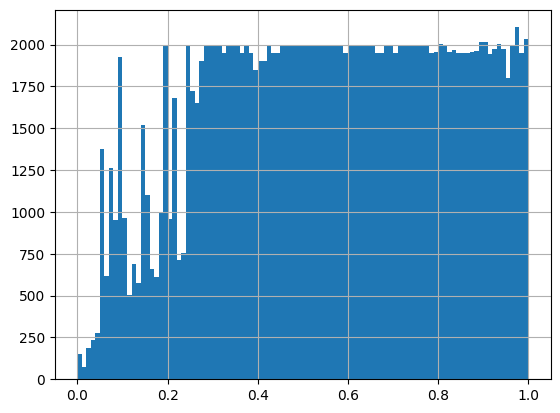

In [28]:
doc_feat['recency'].hist(bins=100)

In [30]:
# normalizing popularity feature to be between 0 and 1
doc_feat['popularity'] = min_max_scaler.fit_transform(doc_feat[['popularity']])
final_features.append('popularity')

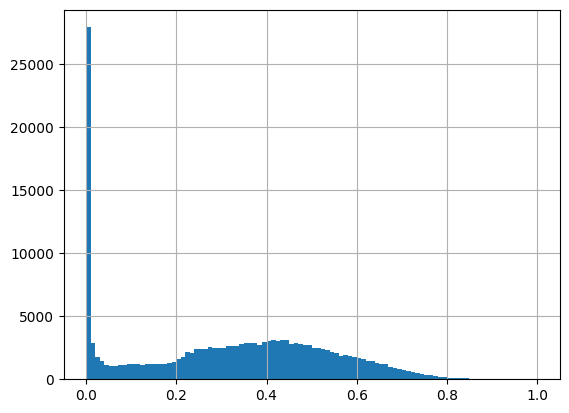

In [29]:
doc_feat['popularity'].hist(bins=100)

In [34]:
# valence is between 0 and 1, so no need to normalize
# loudness is between 0 and a, so no need to normalize
final_features.append('valence')

In [37]:
# normalizing danceability feature to be between 0 and 1
doc_feat['danceability'] = min_max_scaler.fit_transform(doc_feat[['danceability']])
final_features.append('danceability')

In [42]:
doc_feat['loudness'].min()

0.0

In [43]:
doc_feat.describe()

,year,popularity,valence,danceability,loudness,speechiness,acousticness,liveness,label,key,mode,tempo,instrumentalness,energy,duration_ms,recency
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000
mean,1976.787241,0.314318,0.528587,0.543923,0.760035,0.098393,0.502115,0.205839,1.969746,5.199844,0.706902,116.861590,0.167010,0.482389,2.309483e+05,0.563507
std,25.917853,0.218266,0.263171,0.178277,0.089233,0.162740,0.376032,0.174805,1.000020,3.515094,0.455184,30.708533,0.313475,0.267646,1.261184e+05,0.261796
min,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.108000e+03,0.000000
25%,1956.000000,0.110000,0.317000,0.420040,0.710751,0.034900,0.102000,0.098800,1.000000,2.000000,0.000000,93.421000,0.000000,0.255000,1.698270e+05,0.353535
50%,1977.000000,0.330000,0.540000,0.554656,0.773941,0.045000,0.516000,0.136000,2.000000,5.000000,1.000000,114.729000,0.000216,0.471000,2.074670e+05,0.565657
75%,1999.000000,0.480000,0.747000,0.676113,0.827140,0.075600,0.893000,0.261000,3.000000,8.000000,1.000000,135.537000,0.102000,0.703000,2.624000e+05,0.787879
max,2020.000000,1.000000,1.000000,1.000000,1.000000,0.970000,0.996000,1.000000,3.000000,11.000000,1.000000,243.507000,1.000000,1.000000,5.403500e+06,1.000000
